In [1]:
# Density, diffusion, activation energy and ionic conductivity 
from pyiron import Project
from pyiron import ase_to_pyiron, pyiron_to_ase
import sys  
sys.path.insert(0, '/nfshome/deshmukh/vaibhav/scripts')
import analysis_msd as ms

In [2]:
list = [43] #, 47, 4, 13, 42]
list_2 = [773]
pr = Project('/nfshome/deshmukh/pyiron/projects/NASICON/project/hena/hena_1/minimization')
pr_1 = Project("/nfshome/deshmukh/pyiron/projects/NASICON/project/hena/hena_1/glass") 

In [3]:
job = pr['hena_1_struct_eq_big_300k_43']
job_1 = pr['hena_1_struct_eq_big_300k_13']
job_2 = pr['hena_1_struct_eq_big_300k_4']
job_3 = pr['hena_1_struct_eq_big_300k_42']
job_4 = pr['hena_1_struct_eq_big_300k_47']

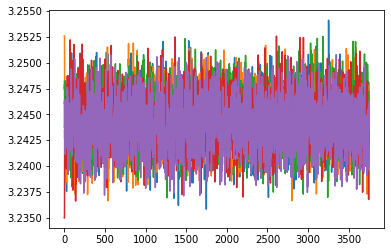

In [4]:
import numpy as np
from scipy.stats import sem
x = job['output/lammps/Density'][1250:5000]
x_1 = job_1['output/lammps/Density'][1250:5000]
x_2 = job_2['output/lammps/Density'][1250:5000]
x_3 = job_3['output/lammps/Density'][1250:5000]
x_4 = job_4['output/lammps/Density'][1250:5000]
import matplotlib.pyplot as plt
plt.plot(x)
plt.plot(x_1)
plt.plot(x_2)
plt.plot(x_3)
plt.plot(x_4)

In [5]:
v = np.mean(job['output/generic/volume'][5001])
#plt.plot(job['output/generic/volume'][1250:5000])
v

82648.505

In [6]:
job_new = pr['hena_1_struct_mini_43'] 

In [7]:
struct = job_new.get_structure(iteration_step=-1)
na_in = struct.select_index("Na")

/tmp/ipykernel_3340828/3283440425.py:1: DeprecationWarning: pyiron_atomistics.atomistics.structure.has_structure.get_structure(iteration_step=-1) is deprecated.
  struct = job_new.get_structure(iteration_step=-1)
2023-05-07 15:38:50,235 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2023-05-07 15:38:50,287 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2023-05-07 15:38:50,315 - pyiron_log - WARNING - Deprecated data structure! Returned array was co

In [8]:
y = (x+x_1+x_2+x_3+x_4)/5

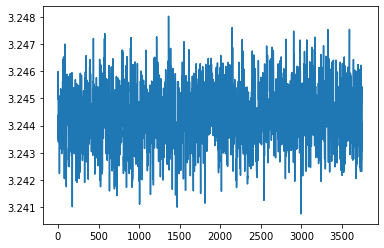

In [9]:
plt.plot(y)

In [10]:
d_avg = np.average(y)
d_sem = sem(y) # standard error 
print('Mean = %s'%d_avg,'Standard_deviations = %s'%(np.std(y, ddof=1)), 'Error = %s'%(d_sem)) 

Mean = 3.244367214886093 Standard_deviations = 0.0010230539757861731 Error = 1.6706401466678538e-05


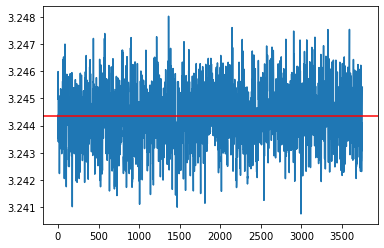

In [11]:
from turtle import color
import matplotlib.pyplot as plt
plt.plot(y)
plt.axhline(y=d_avg,color='red')

Diffusion coefficient = 1.759e-11 [M^2/sec]
Diffusion coefficient = 2.818e-11 [M^2/sec]
Diffusion coefficient = 4.325e-11 [M^2/sec]
Diffusion coefficient = 6.882e-11 [M^2/sec]
Diffusion coefficient = 9.249e-11 [M^2/sec]
Diffusion coefficient = 1.315e-10 [M^2/sec]


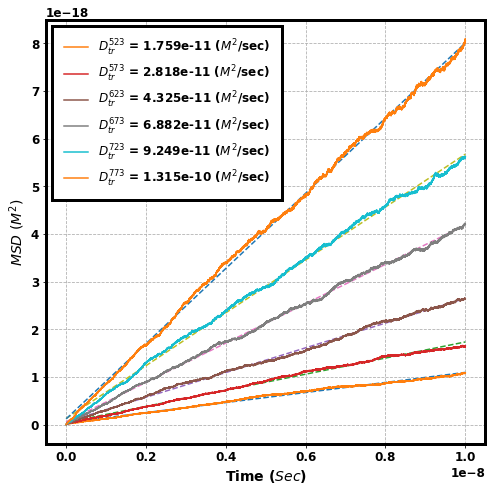

In [47]:
#msd analysis Hena 1 and 5 crystal structure 
d,x,y = ms.msd.dff_coefficient(file='msd_na_big_523k_43_nosmooth.txt',dim=3,temp=523,save=False,file_2="avg_msd_773k_5.png",y_val=11)
d_1,x_1,y_1 = ms.msd.dff_coefficient(file='msd_na_big_573k_43.txt',dim=3,temp=573,save=False,file_2="avg_msd_773k_5.png",y_val=11)
d_2,x_2,y_2 = ms.msd.dff_coefficient(file='msd_na_big_623k_43.txt',dim=3,temp=623,save=False,file_2="avg_msd_773k_5.png",y_val=11)
d_3,x_3,y_3 = ms.msd.dff_coefficient(file='msd_na_big_673k_43.txt',dim=3,temp=673,save=False,file_2="avg_msd_773k_5.png",y_val=11)
d_4,x_4,y_4 = ms.msd.dff_coefficient(file='msd_na_big_723k_43.txt',dim=3,temp=723,save=False,file_2="avg_msd_773k_5.png",y_val=11)
d_5,x_5,y_5 = ms.msd.dff_coefficient(file='msd_na_big_773k_43.txt',dim=3,temp=773,save=True,file_2="avg_msd_crystal_43.png",y_val=11)

In [19]:
# Activation energy 
#ms.msd.activation_energy(d_523=[4.852e-11],d_573=[7.529e-11],d_623=[1.233e-10],d_673=[1.805e-10],d_723=[2.528e-10],d_773=[3.418e-10],new=True,new_temp=300)

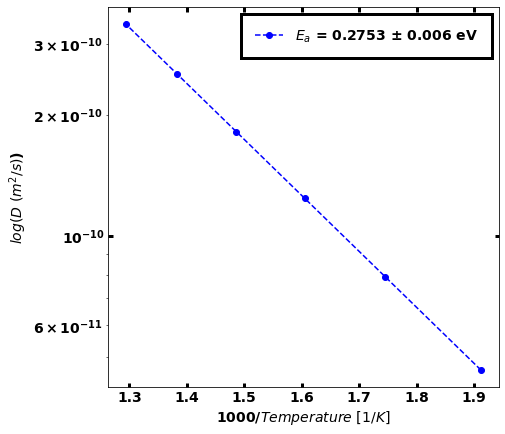

In [13]:
ms.msd.get_arrhenius_plot(temps=[523,573,623,673,723,773],diffusivities=[4.852e-11,7.529e-11,1.233e-10,1.805e-10,2.528e-10,3.418e-10])

In [15]:
ms.msd.fit_arrhenius(temps=[523,573,623,673,723,773],diffusivities=[4.852e-11,7.529e-11,1.233e-10,1.805e-10,2.528e-10,3.418e-10])

(0.27533456147361146, 0.0002093380643821788, 0.005807628722226604)

In [16]:
ms.msd.get_extrapolated_diffusivity(temps=[523,573,623,673,723,773],diffusivities=[4.852e-11,7.529e-11,1.233e-10,1.805e-10,2.528e-10,3.418e-10],new_temp=300)

4.959422967211646e-13

In [17]:
ms.msd.get_extrapolated_diffusivity(temps=[523,573,623,673],diffusivities=[2.064e-09,2.029e-08,4.395e-09,1.614e-07],new_temp=300)

2.6453040835897247e-14

In [18]:
hr = 2.6453040835897247e-14/4.959422967211646e-13

In [19]:
4.959422967211646e-13/hr

9.29793906125504e-12

In [20]:
# Calculate ionic conductivity at 300 kelvin, assuming heaven ratio = 1
# 1. No of sodium ions
# 2. Average cell volume 
# 3. Temperature 
# 4. Oxidation state = padone charges or no of electrons 
#from scipy.constants import codata
#kb = codata.value('Boltzmann constant')
#ev = codata.value('electron volt')
#ev = -ev
#
#def conductivity(charge_carriers, volume, diff, temperature, hr):
#        
#    """
#        Calculate the ionic conductivity.
#
#    Args:
#        charge_carriers (:py:attr:`float`): Number of charge carriers = total no of atoms 
#        volume (:py:attr:`float`): Average cell volume = cm3
#        diff (:py:attr:`float`): Diffusion coefficient. = m2/sec
#        temperature (:py:attr:`float`): Temperature. = Kelvin
#        hr (:py:attr:`float`): Haven ratio. = 1 at the moment
#        Returns:
#        conductivity (:py:attr:`float`): Ionic conductivity = S/cm
#    """

#    volume = volume * (10 ** -24)   # cm3
#    diff = diff #*10000#* (10 ** -8) # cm3/sec
#    conc = charge_carriers / volume # concentration
#    EV = ev ** 2                    # Charges
#    constants = kb * temperature    # 
#    conductivity = ((diff * conc) * EV) / constants
#    return conductivity * hr

In [21]:
len(na_in)

1020

In [22]:
#conductivity(charge_carriers=1020, volume=v, diff=5.511e-13, temperature=303, hr=1)

In [23]:
import scipy.constants as const
def conductivity(charge=1, no_na_atoms=1020,diffu=9.29793906125504e-12,volume=82648.505, T=300):

    x_co = (1000 * no_na_atoms / ((volume * (1e-24))) * (charge)**2 * (const.e) ** 2 / (const.k * T)) * (diffu) * 10000 # Return cond in mS/cm

    return x_co
    
conductivity()

7.111612999864578

In [24]:
const.e

1.602176634e-19

In [25]:
def conductivity(charge=1, no_na_atoms=1020,diffu=4.959422967211646e-13,volume=82648.505, T=300):

    x_co = (1000 * no_na_atoms / ((volume * (1e-24))) * (charge)**2 * (const.e) ** 2 / (const.k * T)) * (diffu) * 10000 # Return cond in mS/cm

    return x_co # 
    
print('Ionic conductiity (mS/cm) = %s'%conductivity())

Ionic conductiity (mS/cm) = 0.37932596259335566


In [26]:
0.41733749339340065/1000 #S/cm

0.00041733749339340067

In [27]:
#import scipy.constants as const
#x_co = (1000 * 1020 / ((v * (1e-24))) * (1)**2 * (const.e) ** 2 / (const.k * 303)) * (5.510961250898897e-13) * 10000

In [28]:
#x_co

In [29]:
from pymatgen.core.periodic_table import get_el_sp
df_sp = get_el_sp('Na')
if hasattr(df_sp, "oxi_state"):
    z = df_sp.oxi_state
    print(z)
else:
    z = df_sp.full_electronic_structure[-1][2]
    print(z)

1


Diffusion coefficient = 2.251e-12 [M^2/sec]
Diffusion coefficient = 3.348e-12 [M^2/sec]
Diffusion coefficient = 5.210e-12 [M^2/sec]
Diffusion coefficient = 7.687e-12 [M^2/sec]
Diffusion coefficient = 1.282e-11 [M^2/sec]
Diffusion coefficient = 1.730e-11 [M^2/sec]


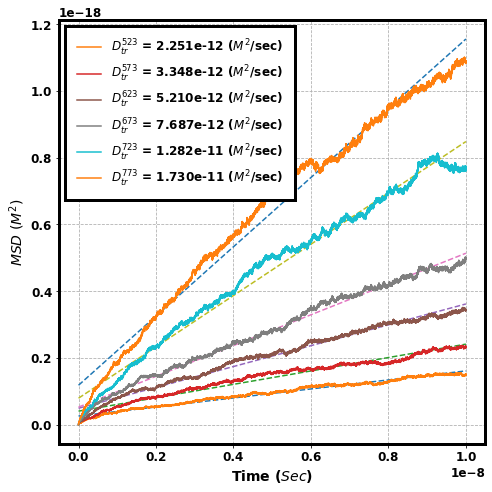

In [57]:
d,x,y = ms.msd.dff_coefficient(file='msd_na_big_glass_523k_43.txt',dim=3,temp=523,save=False,file_2="avg_msd_773k_5.png",y_val=11)
d_1,x_1,y_1 = ms.msd.dff_coefficient(file='msd_na_big_glass_573k_43.txt',dim=3,temp=573,save=False,file_2="avg_msd_773k_5.png",y_val=11)
d_2,x_2,y_2 = ms.msd.dff_coefficient(file='msd_na_big_glass_623k_43.txt',dim=3,temp=623,save=False,file_2="avg_msd_773k_5.png",y_val=11)
d_3,x_3,y_3 = ms.msd.dff_coefficient(file='msd_na_big_glass_673k_43.txt',dim=3,temp=673,save=False,file_2="avg_msd_773k_5.png",y_val=11)
d_4,x_4,y_4 = ms.msd.dff_coefficient(file='msd_na_big_glass_723k_43.txt',dim=3,temp=723,save=False,file_2="avg_msd_773k_5.png",y_val=11)
d_5,x_5,y_5 = ms.msd.dff_coefficient(file='msd_na_big_glass_773k_43.txt',dim=3,temp=773,save=True,file_2="avg_msd_amorph_43.png",y_val=11)

In [38]:
#ms.msd.activation_energy(d_523=[6.715e-12],d_573=[9.799e-12],d_623=[1.491e-11],d_673=[2.198e-11],d_723=[3.472e-11],d_773=[5.286e-11],new=True,new_temp=303)

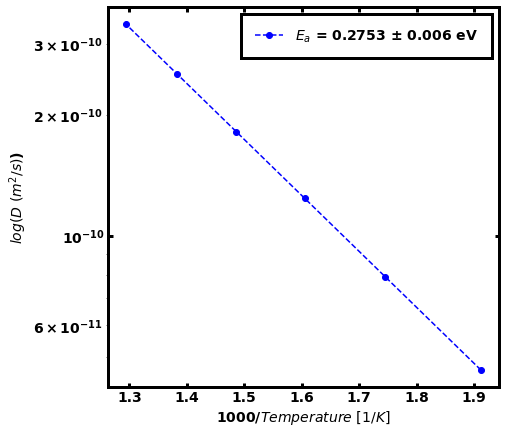

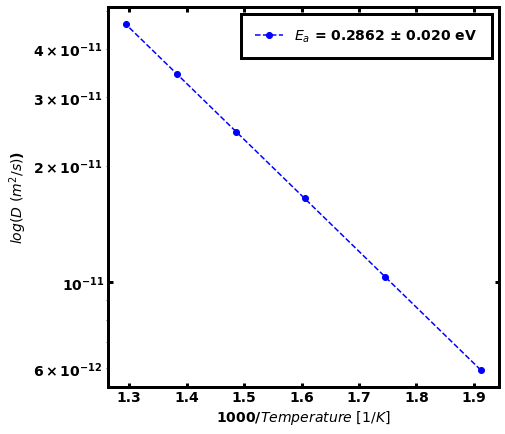

In [31]:
x_x = ms.msd.get_arrhenius_plot(temps=[523,573,623,673,723,773],diffusivities=[4.852e-11,7.529e-11,1.233e-10,1.805e-10,2.528e-10,3.418e-10],save=True,file='activation_energy_cryst_latest.png')
y_y = ms.msd.get_arrhenius_plot(temps=[523,573,623,673,723,773],diffusivities=[6.715e-12,9.799e-12,1.491e-11,2.198e-11,3.472e-11,5.286e-11],save=True,file='activation_energy_amorph_latest.png')

In [32]:
ms.msd.get_extrapolated_diffusivity(temps=[523,573,623,673,723,773],diffusivities=[6.715e-12,9.799e-12,1.491e-11,2.198e-11,3.472e-11,5.286e-11],new_temp=303)

5.906586429839687e-14

In [33]:
# calculate conductivities at different temeprature 
atom = [1020,1020,1020,1020,1020,1020]     # Na atoms not total 
dif = [4.852e-11,7.529e-11,1.233e-10,1.805e-10,2.528e-10,3.418e-10]
vol = [83132.73,83138.2583438411,83138.5100110606,83375.9887768849,83367.9463200798,83428.9325250641]
dif_glas = [6.715e-12,9.799e-12,1.491e-11,2.198e-11,3.472e-11,5.286e-11] 
vol_glass = [81145.70,81419.45,81517.49,81491.1655177416,81727.1033309894,81952.725351577]
temp = [523,573,623,673,723,773]

cond_glass = [] # mS/cm
for i,j,k,l in zip(atom,dif_glas,vol_glass,temp):
    cond_glass.append((ms.msd.conductivity(charge=1,no_na_atoms=i,diffu=j,volume=k,temp=l))/1000)

In [34]:
cond = [] # mS/cm
for i,j,k,l in zip(atom,dif,vol,temp):
    cond.append((ms.msd.conductivity(charge=1,no_na_atoms=i,diffu=j,volume=k,temp=l))/1000)
cond

[0.021163365737659895,
 0.029972255731323155,
 0.04514508443001232,
 0.06100407147024884,
 0.07953849068918543,
 0.1005109908196506]

In [35]:
cond_glass

[0.003000657959447663,
 0.00398324159051373,
 0.005567708307341599,
 0.007600458134303124,
 0.011143278616251445,
 0.015824206466387023]

In [36]:
temp = [523,573,623,673,723,773]
temp_new = []    
t_1 = []                   # 1/K
for i in temp:
    temp_new.append((1/i))
    t_1.append((1/i)*1000)
t_1

[1.9120458891013383,
 1.7452006980802792,
 1.6051364365971108,
 1.4858841010401187,
 1.3831258644536653,
 1.29366106080207]

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.constants as const

def arrhenius_eq(T, A, Ea):
    R = const.R
    return A * np.exp(-Ea / (R * T))

T = temp

conductivity = np.array(cond)

conductivity = conductivity #/ 1000

popt, pcov = curve_fit(arrhenius_eq, T, conductivity)

#print(popt[1] * const.e / const.k)

Ea = popt[1] * const.e / const.k
print(Ea)

print(result)
plt.scatter(1000 / np.array(temp), np.log(conductivity))
#plt.plot(1000 / np.array(temp), arrhenius_eq(np.array(T), *popt), color='red')
plt.xlabel('1000/T (K$^{-1}$)')
plt.ylabel('Conductivity (S/m)')
plt.show()



250210879.67217144


NameError: name 'result' is not defined

In [39]:
import numpy as np
Ea, c, _ = ms.msd.fit_arrhenius(temp, cond) 
arr = (c * np.exp(-Ea / (const.k / const.e * np.array(temp))))#*0.0001   # get log of diffusion
Ea_e, c_e, _e = ms.msd.fit_arrhenius(temp, cond_glass)
arr_e = (c_e * np.exp(-Ea_e / (const.k / const.e * np.array(temp))))#*0.0001 

In [40]:
std_arr = cond
std_arr_e = cond_glass

In [41]:
t_1 = 1000 / np.array(temp)           # temperature
plusminus = u"\u00B1"

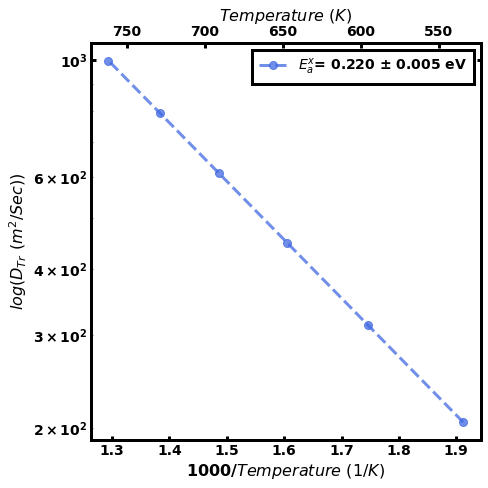

In [42]:
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.xlim([0, 10])
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)

plt.errorbar(t_1,arr,linestyle='--',fmt = 'o',markersize='8',color = 'royalblue', ecolor = 'royalblue',elinewidth = 2, capsize=5,label='$E_{a}^{x}$' + '= {:0.3f} {} {:0.3f} eV'.format(Ea,f'{plusminus}',_), linewidth=3, alpha=0.75)
#plt.errorbar(t_1,arr_1,yerr=std_arr_1,linestyle='--',fmt = '<',markersize='8',color = 'darkorange', ecolor = 'darkorange', elinewidth = 2, capsize=5,label='$E_{a}^{y}$'+ ' = {:0.3f} {} {:0.3f} eV'.format(Ea_1,f'{plusminus}',_1), linewidth=3, alpha=0.75)
#plt.errorbar(t_1,arr_2,yerr=std_arr_2,linestyle='--',fmt = '>',markersize='8',color = 'green', ecolor = 'green',elinewidth = 2, capsize=5,label='$E_{a}^{z}$' + '= {:0.3f} {} {:0.3f} eV'.format(Ea_2,f'{plusminus}',_2), linewidth=3, alpha=0.75)
#plt.errorbar(t_1,arr_3,yerr=std_arr_3,linestyle='--',fmt = 's',markersize='8',color = 'red', ecolor = 'red', elinewidth = 2, capsize=5,label='$E_{a}^{tot}$'+ ' = {:0.3f} {} {:0.3f} eV'.format(Ea_3,f'{plusminus}',_3), linewidth=3, alpha=0.75)


plt.yscale("log")
#plt.title("Arrhenius Plot Crystal vs Amorphous (Ordered)")
plt.xlabel("1000/$Temperature \ (1/K)$", fontsize=16)
plt.ylabel("$log(D_{Tr}\ (m^2/Sec))$", fontsize=16)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper right')#,fontsize=11,ncol=2)#, bbox_to_anchor=(1.60, 1.019))
twin_axes=plt.twiny() 
twin_axes.set_xlim((1/t_1[5])*1000, (1/t_1[0])*1000)
twin_axes.set_xlabel("$Temperature \ (K)$",fontsize=16)
twin_axes.tick_params(axis="x", direction="in")
twin_axes.tick_params(width=3, length=4.5)
#plt.savefig('crystalline_activation_energy_rho.png', bbox_inches='tight', dpi=600, transparent=False)
plt.show()

for crystal; A = 2.727847868612067; E_a = 21.267025626808117 kJ/mol; E_a = 0.21267025626808117 eV
for crystal; A = 0.44808133926696897; E_a = 22.258241669445766 kJ/mol; E_a = 0.22258241669445764 eV


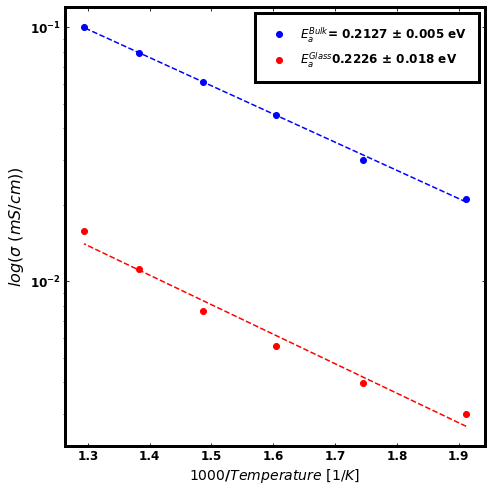

In [43]:
from scipy.stats import linregress
from scipy.constants import R
result = linregress(temp_new,np.log(cond))
activation_energy = - R * result.slope
preexponential_factor = np.exp(result.intercept)
print(f"for crystal; A = {preexponential_factor}; E_a = {activation_energy*10**(-3)} kJ/mol; E_a = {0.01*activation_energy*10**(-3)} eV")

result_2 = linregress(temp_new,np.log(cond_glass))
activation_energy_2 = - R * result_2.slope
preexponential_factor_2 = np.exp(result_2.intercept)
print(f"for crystal; A = {preexponential_factor_2}; E_a = {activation_energy_2*10**(-3)} kJ/mol; E_a = {0.01*activation_energy_2*10**(-3)} eV")

        
plusminus = u"\u00B1"
#print(f'{plusminus}')

err = (0.01)*result.stderr*R*10**(-3)
err_2 = (0.01)*result_2.stderr*R*10**(-3)

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams.update({'font.size': 12})
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(axis="y",direction="in")
plt.tick_params(axis="x",direction="in")
plt.errorbar(t_1,cond,fmt = 'o',color = 'blue', ecolor = 'blue', elinewidth = 2, capsize=5,label=r'$E^{Bulk}_a$' + '= {:0.4f} {} {:0.3f} eV'.format(0.01*activation_energy*10**(-3),f'{plusminus}',err))
plt.errorbar(t_1,cond_glass,fmt = 'o',color = 'red', ecolor = 'red', elinewidth = 2, capsize=5,label=r'$E^{Glass}_a$' + '{:0.4f} {} {:0.3f} eV'.format(0.01*activation_energy_2*10**(-3),f'{plusminus}',err_2))
#plt.scatter(temp_new, d_cryt,marker='o', facecolors='none', label='E_a = {:0.4f} eV (Crystal)'.format(0.01*activation_energy*10**(-3)), color = 'blue')
plt.plot(t_1, np.exp(result.slope * np.asarray(temp_new) + result.intercept), '--', color = 'b')
plt.plot(t_1, np.exp(result_2.slope * np.asarray(temp_new) + result_2.intercept), '--', color = 'r')
plt.yscale("log")
#plt.title("Arrhenius Plot Crystal vs Amorphous (Ordered)")
plt.xlabel("$1000$/$Temperature \ [1/K]$", fontsize=14)
plt.ylabel("$log(\sigma\ (mS/cm))$", fontsize=16)
#plt.ylabel("$\sigma\ [mS/cm]$", fontsize=14)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black", loc='upper right')#, bbox_to_anchor=(1.60, 1.019))
plt.savefig("activation_energy_hena_5.png", bbox_inches='tight', dpi=600, transparent=False)
plt.show()

ValueError: <function color at 0x7ff9d5837430> is not a valid value for color

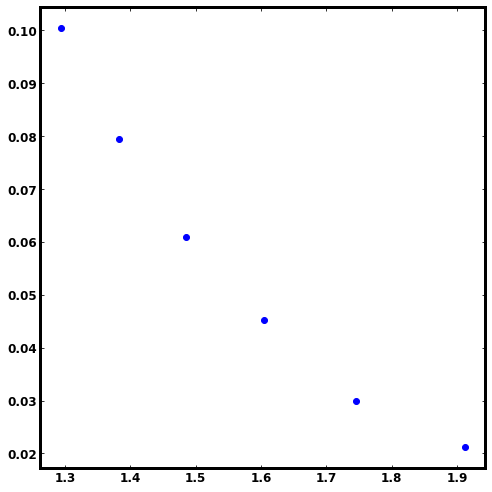

In [44]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams.update({'font.size': 12})
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(axis="y",direction="in")
plt.tick_params(axis="x",direction="in")
plt.errorbar(t_1,cond,fmt = 'o',color = 'blue', ecolor = 'blue', elinewidth = 2, capsize=5,label='$E_a$ = {:0.4f} {} {:0.3f} eV'.format(0.01*activation_energy*10**(-3),f'{plusminus}',err))
#plt.scatter(temp_new, d_cryt,marker='o', facecolors='none', label='E_a = {:0.4f} eV (Crystal)'.format(0.01*activation_energy*10**(-3)), color = 'blue')
plt.plot(t_1, np.exp(result.slope * np.asarray(t_1) + result.intercept), '--', color = color)
plt.yscale("log")
#plt.title("Arrhenius Plot Crystal vs Amorphous (Ordered)")
plt.xlabel("$Temperature \ [1/K]$", fontsize=14)
plt.ylabel("$Diffusion\ [m^2/Sec]$", fontsize=14)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black", loc='upper right')#, bbox_to_anchor=(1.60, 1.019))
#plt.savefig("activation_energy_cryst_amorph_latest.png", bbox_inches='tight', dpi=600, transparent=False)
plt.show()

In [58]:
import numpy as np
# Plot the arrehnious plot together 
df_x_cr = [1.444e-11,2.358e-11,4.157e-11,5.374e-11,8.007e-11,1.010e-10]
df_y_cr = [1.648e-11,2.353e-11,3.845e-11,5.795e-11,8.029e-11,1.092e-10]
df_z_cr = [1.759e-11,2.818e-11,4.325e-11,6.882e-11,9.249e-11,1.315e-10]
df_tot_cr = [4.852e-11,7.529e-11,1.233e-10,1.805e-10,2.528e-10,3.418e-10]
df_x_cr_e = [2.427e-12,3.199e-12,4.940e-12,7.247e-12,1.116e-11,1.750e-11]
df_y_cr_e = [2.037e-12,3.253e-12,4.757e-12,7.044e-12,1.074e-11,1.806e-11]
df_z_cr_e = [2.251e-12,3.348e-12,5.210e-12,7.687e-12,1.282e-11,1.730e-11]
df_tot_cr_e = [6.715e-12,9.799e-12,1.491e-11,2.198e-11,3.472e-11,5.286e-11]


In [59]:
import scipy.constants as const
import sys  
sys.path.insert(0, '/nfshome/deshmukh/vaibhav/scripts')
import analysis_msd as ms

temp = [523,573,623,673,723,773]

In [62]:
# x
Ea, c, _ = ms.msd.fit_arrhenius(temp, df_x_cr)                        # Activation energy 
arr = (c * np.exp(-Ea / (const.k / const.e * np.array(temp))))*0.0001   # get log of diffusion
# y
Ea_1, c_1, _1 = ms.msd.fit_arrhenius(temp, df_y_cr)                      # Activation energy 
arr_1 = (c_1 * np.exp(-Ea_1 / (const.k / const.e * np.array(temp))))*0.0001   # get log of diffusion
# z
Ea_2, c_2, _2 = ms.msd.fit_arrhenius(temp, df_z_cr)                        # Activation energy 
arr_2 = (c_2 * np.exp(-Ea_2 / (const.k / const.e * np.array(temp))))*0.0001   # get log of diffusion
# tot
Ea_3, c_3, _3 = ms.msd.fit_arrhenius(temp, df_tot_cr)                      # Activation energy 
arr_3 = (c_3 * np.exp(-Ea_3 / (const.k / const.e * np.array(temp))))*0.0001   # get log of diffusion

# x
Ea_e, c_e, _e = ms.msd.fit_arrhenius(temp, df_x_cr_e)                        # Activation energy 
arr_e = (c_e * np.exp(-Ea_e / (const.k / const.e * np.array(temp))))*0.0001   # get log of diffusion
## y
Ea_1_e, c_1_e, _1_e = ms.msd.fit_arrhenius(temp, df_y_cr_e)                      # Activation energy 
arr_1_e = (c_1_e * np.exp(-Ea_1_e / (const.k / const.e * np.array(temp))))*0.0001   # get log of diffusion
## z
Ea_2_e, c_2_e, _2_e = ms.msd.fit_arrhenius(temp, df_z_cr_e)                        # Activation energy 
arr_2_e = (c_2_e * np.exp(-Ea_2_e / (const.k / const.e * np.array(temp))))*0.0001   # get log of diffusion
## tot
Ea_3_e, c_3_e, _3_e = ms.msd.fit_arrhenius(temp, df_tot_cr_e)                      # Activation energy 
arr_3_e = (c_3_e * np.exp(-Ea_3_e / (const.k / const.e * np.array(temp))))*0.0001   # get log of diffusion

In [51]:
t_1 = 1000 / np.array(temp)           # temperature
plusminus = u"\u00B1"

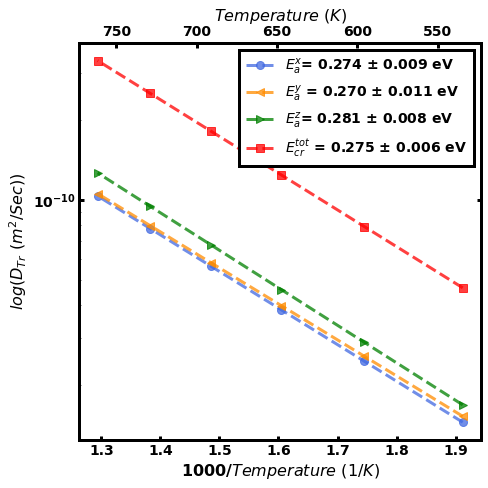

In [64]:
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.xlim([0, 10])
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)

plt.errorbar(t_1,arr,linestyle='--',fmt = 'o',markersize='8',color = 'royalblue', ecolor = 'royalblue',elinewidth = 2, capsize=5,label='$E_{a}^{x}$' + '= {:0.3f} {} {:0.3f} eV'.format(Ea,f'{plusminus}',_), linewidth=3, alpha=0.75)
plt.errorbar(t_1,arr_1,linestyle='--',fmt = '<',markersize='8',color = 'darkorange', ecolor = 'darkorange', elinewidth = 2, capsize=5,label='$E_{a}^{y}$'+ ' = {:0.3f} {} {:0.3f} eV'.format(Ea_1,f'{plusminus}',_1), linewidth=3, alpha=0.75)
plt.errorbar(t_1,arr_2,linestyle='--',fmt = '>',markersize='8',color = 'green', ecolor = 'green',elinewidth = 2, capsize=5,label='$E_{a}^{z}$' + '= {:0.3f} {} {:0.3f} eV'.format(Ea_2,f'{plusminus}',_2), linewidth=3, alpha=0.75)
plt.errorbar(t_1,arr_3,linestyle='--',fmt = 's',markersize='8',color = 'red', ecolor = 'red', elinewidth = 2, capsize=5,label='$E_{cr}^{tot}$'+ ' = {:0.3f} {} {:0.3f} eV'.format(Ea_3,f'{plusminus}',_3), linewidth=3, alpha=0.75)
#plt.errorbar(t_1,arr_3_e,linestyle='--',fmt = 's',markersize='8',color = 'red', ecolor = 'red', elinewidth = 2, capsize=5,label='$E_{am}^{tot}$'+ ' = {:0.3f} {} {:0.3f} eV'.format(Ea_3_e,f'{plusminus}',_3_e), linewidth=3, alpha=0.75)

plt.yscale("log")
#plt.title("Arrhenius Plot Crystal vs Amorphous (Ordered)")
plt.xlabel("1000/$Temperature \ (1/K)$", fontsize=16)
plt.ylabel("$log(D_{Tr}\ (m^2/Sec))$", fontsize=16)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper right')#,fontsize=11,ncol=2)#, bbox_to_anchor=(1.60, 1.019))
twin_axes=plt.twiny() 
twin_axes.set_xlim((1/t_1[5])*1000, (1/t_1[0])*1000)
twin_axes.set_xlabel("$Temperature \ (K)$",fontsize=16)
twin_axes.tick_params(axis="x", direction="in")
twin_axes.tick_params(width=3, length=4.5)
plt.savefig('crystalline_activation_energy_hena_1_5.png', bbox_inches='tight', dpi=600, transparent=False)
plt.show()

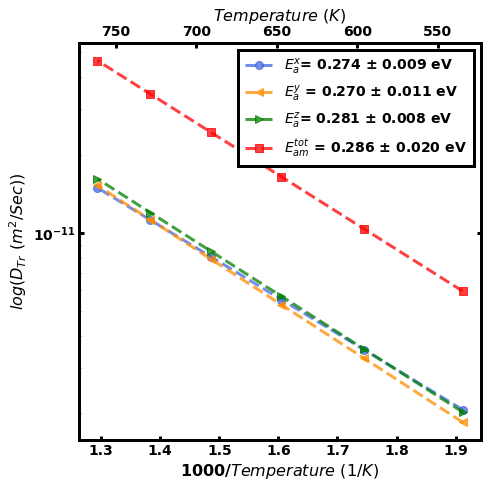

In [65]:
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.xlim([0, 10])
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)

plt.errorbar(t_1,arr_e,linestyle='--',fmt = 'o',markersize='8',color = 'royalblue', ecolor = 'royalblue',elinewidth = 2, capsize=5,label='$E_{a}^{x}$' + '= {:0.3f} {} {:0.3f} eV'.format(Ea,f'{plusminus}',_), linewidth=3, alpha=0.75)
plt.errorbar(t_1,arr_1_e,linestyle='--',fmt = '<',markersize='8',color = 'darkorange', ecolor = 'darkorange', elinewidth = 2, capsize=5,label='$E_{a}^{y}$'+ ' = {:0.3f} {} {:0.3f} eV'.format(Ea_1,f'{plusminus}',_1), linewidth=3, alpha=0.75)
plt.errorbar(t_1,arr_2_e,linestyle='--',fmt = '>',markersize='8',color = 'green', ecolor = 'green',elinewidth = 2, capsize=5,label='$E_{a}^{z}$' + '= {:0.3f} {} {:0.3f} eV'.format(Ea_2,f'{plusminus}',_2), linewidth=3, alpha=0.75)
#plt.errorbar(t_1,arr_3_e,linestyle='--',fmt = 's',markersize='8',color = 'blue', ecolor = 'blue', elinewidth = 2, capsize=5,label='$E_{cr}^{tot}$'+ ' = {:0.3f} {} {:0.3f} eV'.format(Ea_3,f'{plusminus}',_3), linewidth=3, alpha=0.75)
plt.errorbar(t_1,arr_3_e,linestyle='--',fmt = 's',markersize='8',color = 'red', ecolor = 'red', elinewidth = 2, capsize=5,label='$E_{am}^{tot}$'+ ' = {:0.3f} {} {:0.3f} eV'.format(Ea_3_e,f'{plusminus}',_3_e), linewidth=3, alpha=0.75)

plt.yscale("log")
#plt.title("Arrhenius Plot Crystal vs Amorphous (Ordered)")
plt.xlabel("1000/$Temperature \ (1/K)$", fontsize=16)
plt.ylabel("$log(D_{Tr}\ (m^2/Sec))$", fontsize=16)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper right')#,fontsize=11,ncol=2)#, bbox_to_anchor=(1.60, 1.019))
twin_axes=plt.twiny() 
twin_axes.set_xlim((1/t_1[5])*1000, (1/t_1[0])*1000)
twin_axes.set_xlabel("$Temperature \ (K)$",fontsize=16)
twin_axes.tick_params(axis="x", direction="in")
twin_axes.tick_params(width=3, length=4.5)
plt.savefig('amorphous_activation_energy_hena_1_5.png', bbox_inches='tight', dpi=600, transparent=False)
plt.show()

In [59]:
c_3

0.0002093380643821788

In [60]:
c_3_e

3.406330169507772e-05

In [ ]:
# The 